In [18]:
import numpy as np
import json
import glob
import re
# from textblob import TextBlob

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy
import spacy
from nltk.corpus import stopwords

# sentiments
import nltk
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# vis
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt

import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [14]:
def load_data(file):
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

data_array = []
for i in range(0, 1):
    data = load_data(
        'C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_Laptops.json')[i]["reviews"]
    print(data[0]["review_body"])
    # print(data[i]["review_body"])
    data_array.append(data[0]["review_body"])
    # print(data)

I bought this Compaq A1500 this week and am more than satisfied with it. Simple installation without any problems, excellent photo quality resolution even on plain paper, very good managing software and the best part is, I didn't need any customer support to make it run :).
Very good product with excellent features, quality and resolution. Believe me it's better than the best available in this price range.


In [20]:


# Example review text
# review_text = """I bought this Compaq A1500 this week and am more than satisfied with it. Simple installation without any problems, excellent photo quality resolution even on plain paper, very good managing software and the best part is, I didn't need any customer support to make it run :). Very good product with excellent features, quality and resolution. Believe me it's better than the best available in this price range."""
tokens = word_tokenize(data_array[0].lower())  # Convert text to lowercase

# Remove punctuation and stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stopwords]

# Create a Gensim dictionary
dictionary = Dictionary([tokens])

# Create a corpus
corpus = [dictionary.doc2bow(tokens)]
# Perform sentiment analysis on the review text
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(data_array[0])

# Example corpus and dictionary (you would typically have multiple documents in a corpus)
# corpus = [[(0, 1), (1, 1), (2, 1)],
#           [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
#           [(0, 1), (3, 1), (4, 1), (8, 1)],
#           [(2, 1), (6, 1), (8, 1), (9, 1)],
#           [(0, 1), (10, 1), (11, 1), (12, 1)]]

dictionary = Dictionary.from_corpus(corpus)

# Example LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4)

# Visualize the LDA model
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Add sentiment information to the visualization
lda_display.topic_info['sentiment_score'] = scores['compound']

# Display the visualization
pyLDAvis.display(lda_display)


c:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\GS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_u

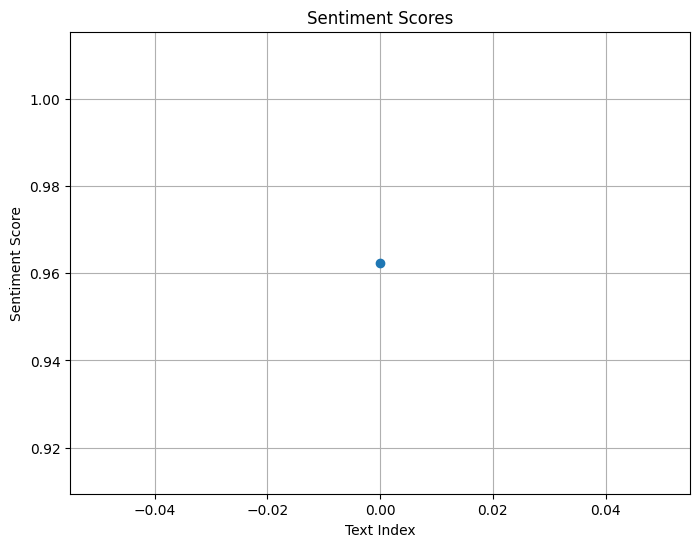

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(scores, marker='o', linestyle='-')
plt.title('Sentiment Scores')
plt.xlabel('Text Index')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()